In [19]:
# import relevant libraries
import pandas as pd

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# load data into a pandas dataframe
crime_df = pd.read_csv("dataset/crime.csv", encoding = "ISO-8859-1")

In [22]:
# get the dimension of the dataframe
crime_df.shape

(319073, 17)

In [23]:
# get the fields
crime_df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [24]:
# get the information about the dataframe
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [25]:
# check if the data contains NULL values
crime_df.isnull().sum().any()
# True, meaning there are NULL values

True

In [26]:
# get the value count of 'SHOOTING' column
crime_df['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [27]:
# drop a column from the dataframe
updated_crimedf = crime_df.drop(['SHOOTING'], axis=1)

In [28]:
# check columns
updated_crimedf.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

In [29]:
# drop the rows where at least one element is missing
cleaned_crimedf = updated_crimedf.dropna()

In [30]:
# check the new dimension of the dataframe
cleaned_crimedf.shape

(296573, 16)

In [31]:
# import datetime
from datetime import datetime

# convert string to timestamp
cleaned_crimedf["OCCURRED_ON_DATE"] = cleaned_crimedf["OCCURRED_ON_DATE"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [32]:
# split OCCURRED_ON_DATE into date and time
cleaned_crimedf['DATE'] = [d.date() for d in cleaned_crimedf['OCCURRED_ON_DATE']]
cleaned_crimedf['TIME'] = [d.time() for d in cleaned_crimedf['OCCURRED_ON_DATE']]

In [33]:
# display first five fields
cleaned_crimedf.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DATE,TIME
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02,13:00:00
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21,00:00:00
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03,19:27:00
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03,21:16:00
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03,21:05:00


In [34]:
crimedf = cleaned_crimedf

In [35]:
# frequency count of Date
count = crimedf['DATE'].value_counts()

In [36]:
# import relevant libraries
import matplotlib.pyplot as plt

Text(0,0.5,'Number of Crimes')

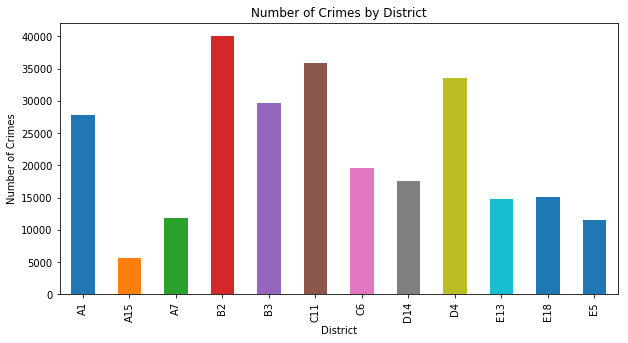

In [49]:
# plot Number of Crimes by District
fig, ax = plt.subplots(figsize=(10, 5))
crimedf.groupby('DISTRICT')['INCIDENT_NUMBER'].nunique().plot(kind='bar')
plt.title('Number of Crimes by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')